<a href="https://colab.research.google.com/github/ChenHY1217/Projects-In-MLAI/blob/main/ProjectsInMLAIhw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Implementation

## Task 1 - Advanced Objective Function and Use Case

### Derive with MLE
To derive the objective function for Logistic Regression, we consider the Maximum likelihood estimation (MLE).

Since we are working with logistic regression which uses the sigmoid function to model the probility of a sample data point x belonging to (y=1), we have $h_w(x) = 1 / (1 + e^{-w^T x})$.

From here, since this is binary classification, we consider a Bernoulli distribution. We know that for $y=1$, $P(y|x;w) = h_w(x)$ and for $y=0$, $P(y|x;w) = 1 - h_w(x)$.

This can be combined into $P(y|x;w) = (h_w(x))^y(1 - h_w(x))^{1-y})$.

Now we take the likelihood function, apply the logarithm transform and substitute in the probability expression for logistic regression to get:

$l(w) = log(L(w)) = ∑_{i=1}^n [y_ilog(h_w(x_i))+(1-y_i)log(1-h_w(x_i))]$

Now we want to find the objective function or the cost / error function that we want to minimize. This is the same as minimizing the negative of the likelihood function above, aka the NLL (negative log-likelihood).

Therefore our objective function is:

$E(w) = -\frac{1}{N}∑_{i=1}^n [y_ilog(h_w(x_i))+(1-y_i)log(1-h_w(x_i))]$

and we seek to minimize this by finding the optimal w (if we want to average the results, we can add an $1/N$ to the front of the summation).



### MAP technique for Logistic Regression

MLE seeks to find the parameter w that maximizes the likelihood of the data: $P(y|x;w)$. This assumes that we have no prior knowledge about the distribution of the weights w. The risk here is that we are prone to overfitting because we are trying to fit the training data perfectly, especially if the dataset is small.

MAP (Maximum A Posteriori) however, seeks to find the posterior probability: $P(w | y; x)$. Using Bayes' Theorem, we get that this is proportional to $P(y|x;w) * P(w)$ or the likelihood times the prior.

The key difference here is MAP incorporates a prior belief on the weights before seeing the data and therefore regularizes and reduces overfitting.

Citations:

* https://medium.com/@devcharlie2698619/the-intuition-behind-maximum-likelihood-estimation-mle-and-maximum-a-posteriori-estimation-map-b8ba1ba1078f




### Define a Logistic Regression ML Problem

One such machine learning problem would be credit card fraud detection. In determining whether a transaction is fraud (1) or not fraud (0), we can apply Logistic Regression to get a probabilistic prediction. This is great for calculating risks and for determining whether a credit card should be instantly shut down or just notify the user.

Logistic Regression is the best choice here because in fraud detection, a simple yes/no is insufficient. We would need to set certain thresholds for decisions and the probabilities that Logistic Regression outputs are best suited for this. We are also able to see which features contribute the most to fraud by examining the weights.

We can compare this to the linear model / linear classification model defined in class. The Linear classification model is capable of classifying but it is only able to give either a yes or no. This is insufficient for this matter as a probabilistic output is more useful.

The following dataset gathered from Kaggle contains data regarding credit card transactions and their classifications. Due to a PCA transformation, we are not able to access the original features, but instead are provided with V1 - V28 features as well as feature 'Time' which contains the seconds elapsed between each transaction and the first transaction in the dataset and feature 'Amount' which is the transaction Amount.

Below are the correspondence to the MLE derivation:

$x_i$: this is the i-th transaction in the dataset and is a vector including each feature.

$y_i$: this is the target label for the i-th transaction with 1 being fraudulent and 0 being legit.

$w$: this is the weights to be learned by the model with $w_j$ being the weight associated with feature j and $w_0$ being the bias.

$h_w(x_i)$: the predicted probability that transaction i is fraudulent using the sigmoid function.

$N$: size of the dataset or total number of transactions.

A couple assumptions to be noted:

We assume the data is I.I.D, the relationship between the features and the log-odds of being fraud is linear, and that their is no multicollinearity.


## Task 2 - Dataset and Advanced EDA

### Selecting the Dataset

We will be using the following dataset from Kaggle on credit card fraud detection.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

### EDA

We will be performing EDA on this dataset. The following code involves calculating VIF and visualizing the relations between features through plots and heatmaps.



Importing Dataset

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# load dataset
df = pd.read_csv(path + "/creditcard.csv")

Using Colab cache for faster access to the 'creditcardfraud' dataset.


In [15]:
# Quick stats
print(df.head())
print(df.describe())

print(df.isnull().sum().max())

# Scale the "Amount" and "Time" feature to match the other features
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_Scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original "Amount" and "Time" columns
df_scaled = df.drop(['Time', 'Amount'], axis=1)

print(df_scaled.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Note that there is no missing values in the dataset. Note that "Amount" and "Time" has much larger numbers compared to the other features, so we perform rescaling.

After calculating the VIF values for each feature, we discover that "Amount" has a high VIF value exceeding 10, therefore we need to eliminate this feature that has high multicollinearity. This is likely due to the other PCA components having high correlation to the actual amount in the transaction, such as types of transactions.

EDA - VIF

In [16]:
df_final = df_scaled.drop(['Amount_Scaled'], axis=1)

# drop Class (label) for VIF calculation
features = df_final.drop(['Class'], axis=1)

# calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["features"] = features.columns

print(vif)

    VIF Factor     features
0     1.025906           V1
1     1.000211           V2
2     1.330979           V3
3     1.020827           V4
4     1.056305           V5
5     1.007464           V6
6     1.013490           V7
7     1.002566           V8
8     1.000141           V9
9     1.001762          V10
10    1.115321          V11
11    1.029065          V12
12    1.008164          V13
13    1.018333          V14
14    1.063262          V15
15    1.000266          V16
16    1.010099          V17
17    1.015374          V18
18    1.001578          V19
19    1.004863          V20
20    1.003762          V21
21    1.039010          V22
22    1.004916          V23
23    1.000492          V24
24    1.102120          V25
25    1.003223          V26
26    1.000050          V27
27    1.000167          V28
28    1.879717  Time_Scaled


EDA - Visualization

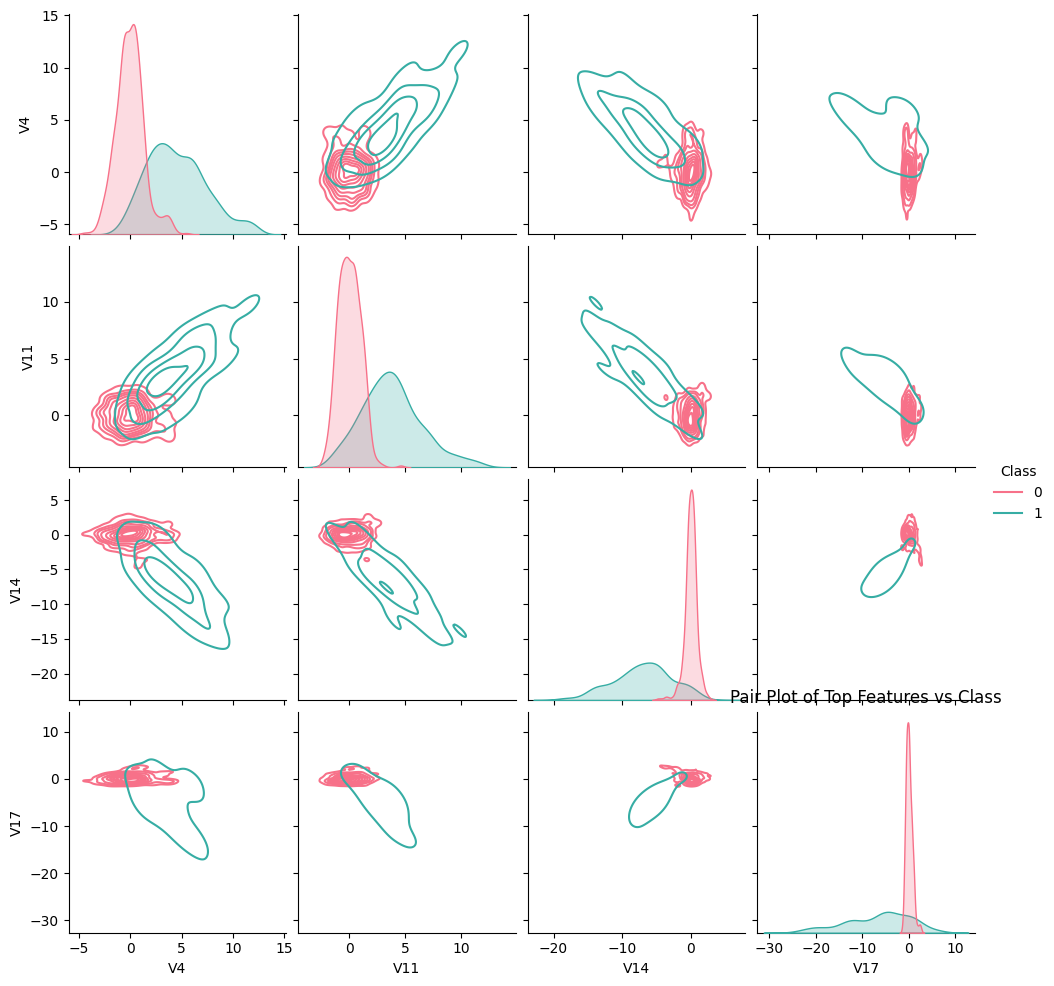

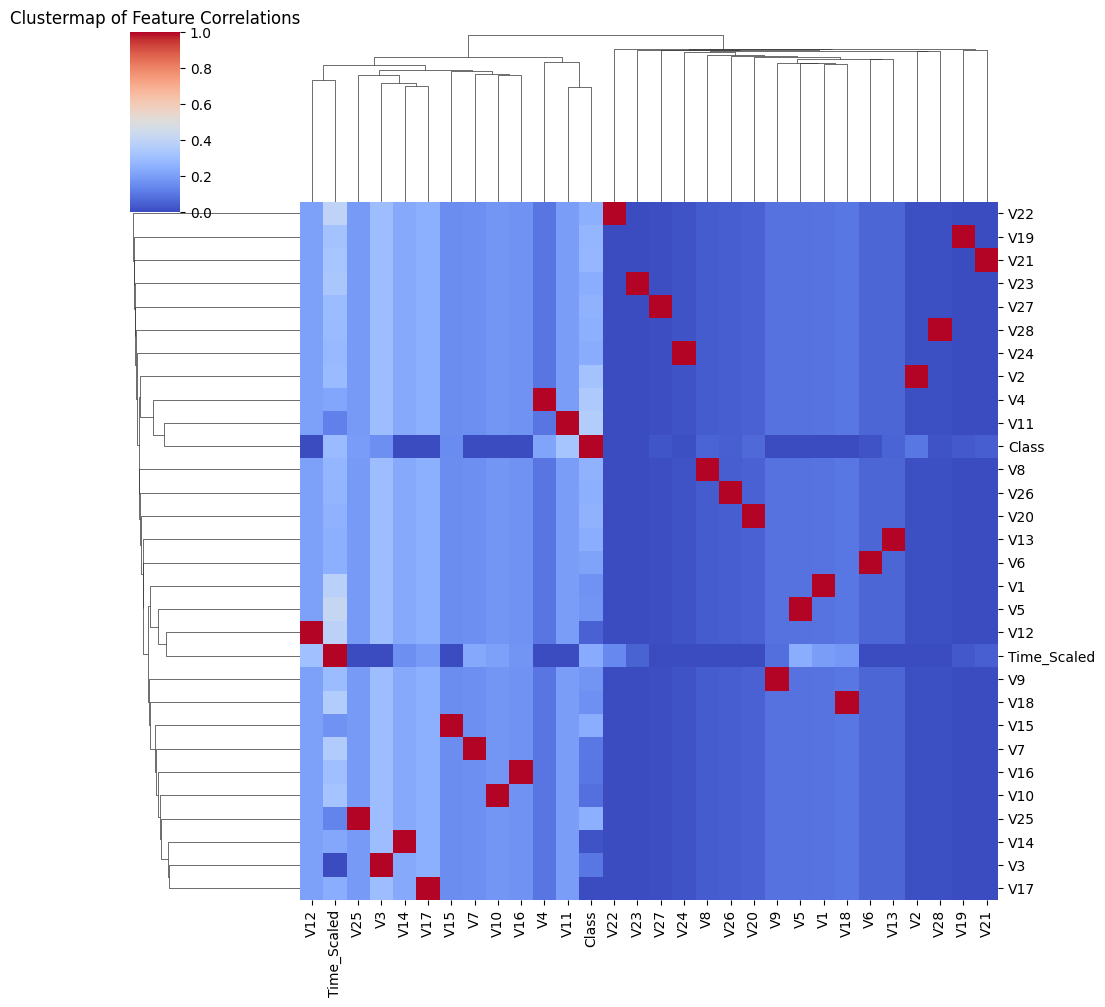

In [17]:
# Pair Plots with KDE

# take sample
df_fraud = df_final[df_final['Class'] == 1]
df_normal = df_final[df_final['Class'] == 0].sample(n=492, random_state=42)

sample_df = pd.concat([df_fraud, df_normal])

features_to_plot = ['V4', 'V11', 'V14', 'V17', 'Class']

# plotting pair plot
sns.pairplot(sample_df[features_to_plot], hue='Class', kind='kde', palette='husl')
plt.title('Pair Plot of Top Features vs Class')
plt.show()

# Heatmap with Clustering
# correlation matrix
corr = df_final.corr()
sns.clustermap(corr, cmap="coolwarm", standard_scale=1)
plt.title('Clustermap of Feature Correlations')
plt.show()


Notice in the pair plots, the two colors are clearly separated, indicating that these corresponding features are good predictors. It also suggests that a linear decision boundary shoud be able to effectively separate these classes.

Meanwhile, in the heatmap, most of it is blue which is expected from the PCA transformation. This indicates that multicollinearity is not a significant concern, though Amount and Time should be monitored.

## Task 3 - Logistic Regression Implementation

Below is the implementation of three variants of Logistic Regression: Batch Gradient Descent, Stochastic Gradient Descent, and Mini-batch Gradient Descent.

In [18]:
# Logistic Regression

import numpy as np
import matplotlib.pyplot as plt

# Let's make a class for LR
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000, add_bias=True):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.add_bias = add_bias
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def add_bias_term(self, X):
        bias_term = np.ones((X.shape[0], 1))
        return np.hstack((bias_term, X))

    def cost_function(self, y_true, y_pred): # objective function
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        N = len(y_true)
        return (-1 / N) * (np.dot(y_true.T, np.log(y_pred)) + np.dot((1 - y_true).T, np.log(1 - y_pred)))

    def fit(self, X, y, method="batch", batch_size=64):
        # method can be "batch", "stochastic", or "mini-batch"
        if self.add_bias:
            X = self.add_bias_term(X)

        m, n = X.shape
        self.weights = np.zeros(n)
        self.cost_history = []

        for i in range(self.num_iterations):

            # Batch Gradient Descent
            if method == "batch":
                y_pred = self.sigmoid(np.dot(X, self.weights))
                grad = (1 / m) * np.dot(X.T, (y_pred - y))
                self.weights -= self.learning_rate * grad

                cost = self.cost_function(y, y_pred)
                self.cost_history.append(cost)

            # Stochastic Gradient Descent
            elif method == "stochastic":

                rand_ind = np.random.randint(0, m)
                xi = X[rand_ind, :].reshape(1, n)
                yi = y[rand_ind]

                y_pred = self.sigmoid(np.dot(xi, self.weights))
                grad = np.dot(xi.T, (y_pred - yi))
                self.weights -= self.learning_rate * grad

                y_pred_all = self.sigmoid(np.dot(X, self.weights))
                cost = self.cost_function(y, y_pred_all)
                self.cost_history.append(cost)

            # Mini-Batch Gradient Descent
            elif method == "mini-batch":

                inds = np.random.permutation(m)
                X_shuffled = X[inds]
                y_shuffled = y[inds]

                for j in range(0, m, batch_size):
                    xi = X_shuffled[j:j+batch_size]
                    yi = y_shuffled[j:j+batch_size]

                    if len(yi) < batch_size:
                        continue

                    y_pred = self.sigmoid(np.dot(xi, self.weights))
                    grad = np.dot(xi.T, (y_pred - yi)) / batch_size
                    self.weights -= self.learning_rate * grad

                    y_pred_all = self.sigmoid(np.dot(X, self.weights))
                    cost = self.cost_function(y, y_pred_all)
                    self.cost_history.append(cost)

            elif method == "mini-batch-for-comparison":
                inds = np.random.permutation(m)
                X_shuffled = X[inds]
                y_shuffled = y[inds]

                for j in range(0, m, batch_size):
                    xi = X_shuffled[j:j+batch_size]
                    yi = y_shuffled[j:j+batch_size]

                    if len(yi) < batch_size:
                        continue

                    y_pred = self.sigmoid(np.dot(xi, self.weights))
                    grad = np.dot(xi.T, (y_pred - yi)) / batch_size
                    self.weights -= self.learning_rate * grad

                y_pred_all = self.sigmoid(np.dot(X, self.weights))
                cost = self.cost_function(y, y_pred_all)
                self.cost_history.append(cost)

    def predict_prob(self, X):
        if self.add_bias:
            X = self.add_bias_term(X)
        return self.sigmoid(np.dot(X, self.weights))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

Splitting into Training and Test Datasets

In [19]:
from sklearn.model_selection import train_test_split

X = df_final.drop('Class', axis=1).values
y = df_final['Class'].values

# Stratified Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (227845, 29)
Testing shape: (56962, 29)


Running the Implementation, Plotting, and Comparisons

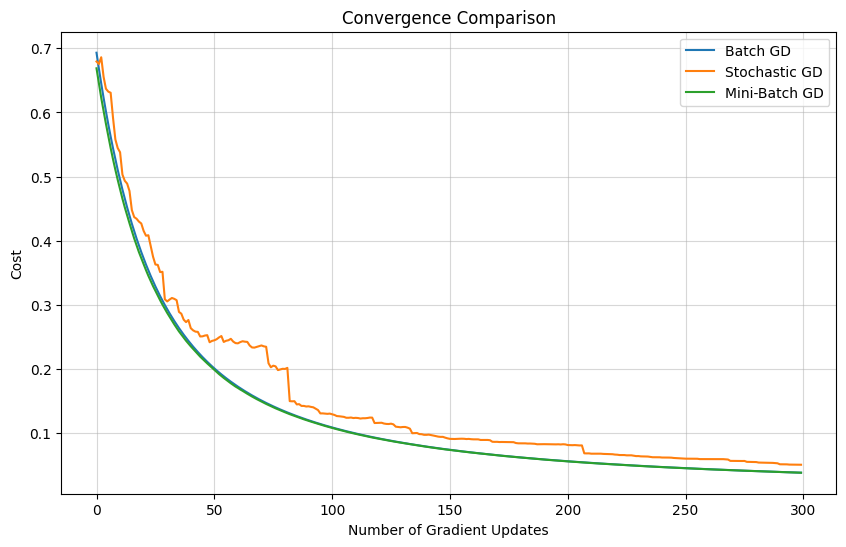

In [20]:
# Train Batch
model_batch = LogisticRegression(learning_rate=0.1, num_iterations=500)
model_batch.fit(X, y, method='batch')

# Train SGD
model_sgd = LogisticRegression(learning_rate=0.1, num_iterations=500)
model_sgd.fit(X, y, method='stochastic')

# Train Mini-Batch
model_mini = LogisticRegression(learning_rate=0.1, num_iterations=1)
model_mini.fit(X, y, method='mini-batch', batch_size=64)

# Plotting
limit = 300
plt.figure(figsize=(10, 6))
plt.plot(model_batch.cost_history[:limit], label='Batch GD')
plt.plot(model_sgd.cost_history[:limit], label='Stochastic GD')
plt.plot(model_mini.cost_history[:limit], label='Mini-Batch GD')
# plt.xscale('log')

plt.title('Convergence Comparison')
plt.xlabel('Number of Gradient Updates')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

Batch Gradient Descent exhibits a smooth decreasing curve in its cost with respect to each gradient update.

Stochastic Gradient Descent exhibits a more noisy, random curve. This curve sometimes goes up, but still follows a downward trend towards converging.

Mini-batch Gradient Descent is very similar to Batch Gradient Descent, with its smooth curve reaching convergence.

Note, during plotting, there were several issues with creating a meaningful plot. This is due to how the gradient updates were recorded during the iterations. For one epoch, mini-batch experienced 4000+ gradient updates. This required some rebalancing of how many iterations needed and zooming in on the plot.



## Task 4 - Optimization Techniques and Advanced Comparison

Optimization Algorithms

Momentum, Nesterov, Adam

The above algorithms will be implemented using Sklearn libraries. It will then be compared to our vanilla Logistic Regression implementation from Task 3. I replaced RMSProp with Nesterov as the third algorithm because Sklearn does not have RMSProp.

We will use the MLPClassifier with an empty hidden layer because Logistic Regression implementation in Sklearn doesn't support Adam. This is the same as implementing LR.

In [22]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# momentum
model_momentum = MLPClassifier(
    hidden_layer_sizes=(),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.01,
    momentum=0.9,
    max_iter=100,
    random_state=42
)

model_adam = MLPClassifier(
    hidden_layer_sizes=(),
    activation='logistic',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=100,
    random_state=42
)

# Nesterov
model_nesterov = MLPClassifier(
    hidden_layer_sizes=(),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.01,
    nesterovs_momentum=True,
    momentum=0.9,
    max_iter=100,
    random_state=42
)

### Running Implementations and compare with Vanilla SGD

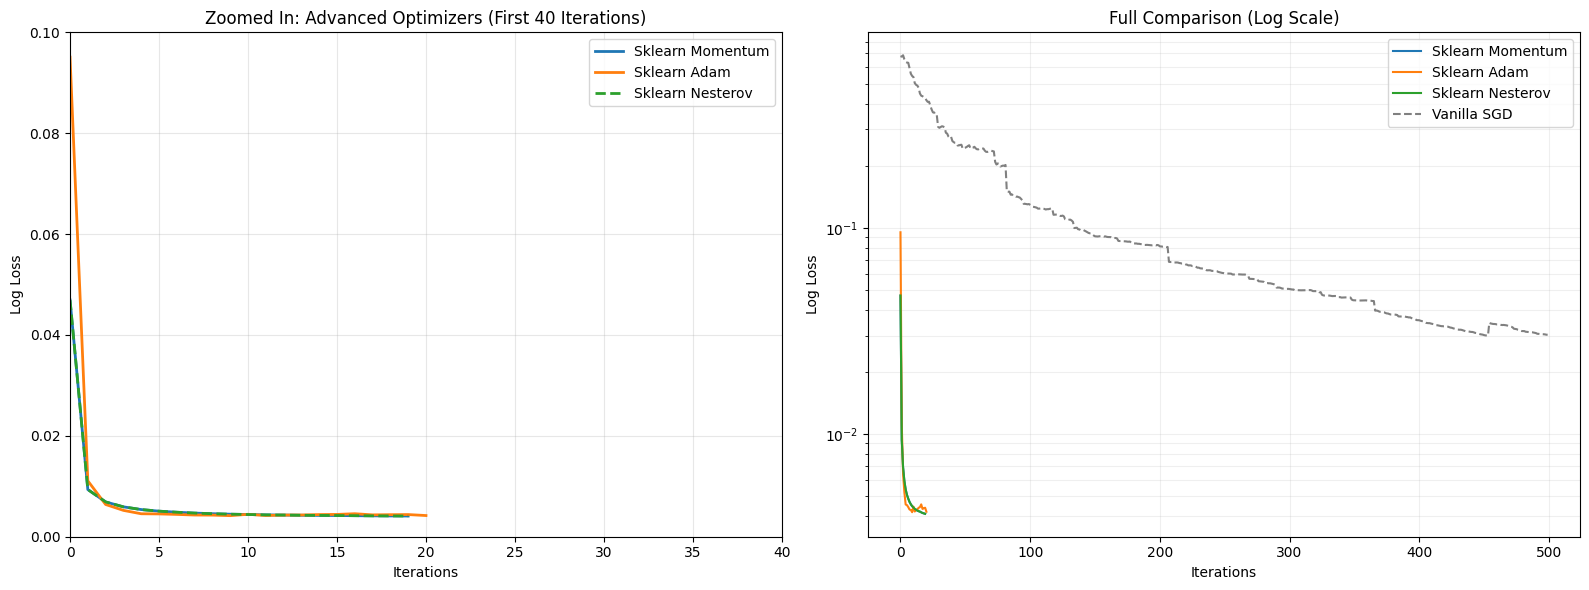

In [31]:
# Train
model_momentum.fit(X_train, y_train)
model_adam.fit(X_train, y_train)
model_nesterov.fit(X_train, y_train)

# Plot Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(model_momentum.loss_curve_, label='Sklearn Momentum', linewidth=2)
ax1.plot(model_adam.loss_curve_, label='Sklearn Adam', linewidth=2)
ax1.plot(model_nesterov.loss_curve_, label='Sklearn Nesterov', linewidth=2, linestyle='--')

ax1.set_xlim(0, 40)
ax1.set_ylim(0, 0.1)
ax1.set_title('Zoomed In: Advanced Optimizers (First 40 Iterations)')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Log Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(model_momentum.loss_curve_, label='Sklearn Momentum')
ax2.plot(model_adam.loss_curve_, label='Sklearn Adam')
ax2.plot(model_nesterov.loss_curve_, label='Sklearn Nesterov')
ax2.plot(model_sgd.cost_history, label='Vanilla SGD', color='gray', linestyle='--')

ax2.set_yscale('log')
ax2.set_title('Full Comparison (Log Scale)')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Log Loss')
ax2.legend()
ax2.grid(True, which="both", alpha=0.2)

plt.tight_layout()
plt.show()



The above is a plot of Loss vs Iterations and demonstrates the difference in convergence speeds between each algorithm.

We examine that Adam converges the fastest, with a rapid drop starting from the earliest iterations. Momentum and Nesterov also converges fast and at a very similar rate. All three algorithms prove to be faster at converging than Vanilla SGD.

### Defining Evaluating Metrics

We will consider three metrics to analyze and interpret the results of each optimization algorithm: precision, recall, and F1 score.

Precision = True Positives / predicted True

Recall = True Positives / actual True

F1 Score = 2 * (precision * recall) / (precision + recall)

citations:
* https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def eval_sklearn_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    return precision, recall, f1

# Evaluate models based on metrics
precision_momentum, recall_momentum, f1_momentum = eval_sklearn_model(model_momentum, X_test, y_test, 'Momentum')

precision_adam, recall_adam, f1_adam = eval_sklearn_model(model_adam, X_test, y_test, "Adam")

precision_nesterov, recall_nesterov, f1_nesterov = eval_sklearn_model(model_nesterov, X_test, y_test, "Nesterov")

print("-" * 30)
best_model_name = "Momentum"
best_f1 = f1_momentum

if f1_adam > best_f1:
    best_model_name = "Adam"
    best_f1 = f1_adam
if f1_nesterov > best_f1:
    best_model_name = "Nesterov"
    best_f1 = f1_nesterov

print(f"Winner based on F1-Score: {best_model_name} ({best_f1:.4f})")

print("\nPrinting detailed metrics:")
print(f"Momentum: Precision={precision_momentum:.4f}, Recall={recall_momentum:.4f}, F1={f1_momentum:.4f}")
print(f"Adam: Precision={precision_adam:.4f}, Recall={recall_adam:.4f}, F1={f1_adam:.4f}")
print(f"Nesterov: Precision={precision_nesterov:.4f}, Recall={recall_nesterov:.4f}, F1={f1_nesterov:.4f}")

Metrics for Momentum:
Precision: 0.8356
Recall: 0.6224
F1 Score: 0.7135
Confusion Matrix:
[[56852    12]
 [   37    61]]
Metrics for Adam:
Precision: 0.8140
Recall: 0.7143
F1 Score: 0.7609
Confusion Matrix:
[[56848    16]
 [   28    70]]
Metrics for Nesterov:
Precision: 0.8356
Recall: 0.6224
F1 Score: 0.7135
Confusion Matrix:
[[56852    12]
 [   37    61]]
------------------------------
Winner based on F1-Score: Adam (0.7609)

Printing detailed metrics:
Momentum: Precision=0.8356, Recall=0.6224, F1=0.7135
Adam: Precision=0.8140, Recall=0.7143, F1=0.7609
Nesterov: Precision=0.8356, Recall=0.6224, F1=0.7135


Interpretation of Results:

We see that Adam is the clear winner in terms of F1 score, outperforming both Momentum and Nesterov. This is beacuse of its high Recall, meaning that it successfully identified more fraudulent transactions than the other two algorithms. This is a major improvement.

Interestingly, Momentum and Nesterov yielded identical results. This may mean that for this specific dataset, the look ahead feature of Nesterov did not give it a significant advantage over regular momentum.

If we look at the metrics, we see Adam with a high Precision, meaning it is more aggressive at assuming fraud. Meanwhile, that aggression leads to a high recall which is desirable.

### Hyperparameter Tuning

We will conduct a grid search to find the best hyperparameter for the optimization algorithms. The hyperparameter of interest is the learning rate.


citations:
* https://www.geeksforgeeks.org/machine-learning/hyperparameter-tuning/

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# For hyperparameter tuning
param_grid = [
    # Grid for SGD-based algorithms (Momentum & Nesterov)
    {
        'solver': ['sgd'],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'momentum': [0.9, 0.95],
        'nesterovs_momentum': [True, False]
    },
    # Grid for Adam
    {
        'solver': ['adam'],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }
]

# Initialize Base Model
base_model = MLPClassifier(hidden_layer_sizes=(), activation='logistic', max_iter=100, random_state=42)

# Run Grid Search
print("Running GridSearchCV")
grid_search = GridSearchCV(base_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4. Report Results
print("\n--- Best Global Configuration ---")
print("Best Params:", grid_search.best_params_)
print(f"Best CV F1 Score: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n--- Final Test Set Evaluation ---")
print(classification_report(y_test, y_pred, target_names=['Legit', 'Fraud']))

Running GridSearchCV

--- Best Global Configuration ---
Best Params: {'learning_rate_init': 0.1, 'momentum': 0.95, 'nesterovs_momentum': False, 'solver': 'sgd'}
Best CV F1 Score: 0.7921

--- Final Test Set Evaluation ---
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.86      0.50      0.63        98

    accuracy                           1.00     56962
   macro avg       0.93      0.75      0.82     56962
weighted avg       1.00      1.00      1.00     56962



After performing GridSearch CV, we discovered that the best params would be the above with standard momentum, yielding the best F1 score.

This is interesting as Adam is expected to be the best but in this case Momentum is superior. Looking at the params, we see that we have a high learning rate and a high momentum. This is what likely helped push the model faster towards convergence.

However, looking at the test F1 score, we see that it is much lower that the CV F1 score. This is an indication of overfitting. By fitting with overly aggressive parameters, the model did not generalize well to the unseen test set. In addition it also has a poor recall.

Therefore, we see that although Grid Search found a model with higher F1 socre on training data, the Adam model is the best model because of its ability to generalize well.

### Conclusion

After evaluating each algorithm and tuning, we discovered the following results.

In terms of computational complexity, Vanilla SGD is the cheapest per step, however it is very slow to converge. On the other hand, Adam is the most expensive per step but converges rapidly. For a large dataset like this one, Adam is more suitable because the time saved outweighs the computational power needed. In addition, high recall is strongly preferred in this context to minimize fraud. Adam's ability to maximize recall while maintaining precision makes it the best solution for minimizing financial loss.

